### Project - Bank term deposit marketing analysis and prediction.- (Classification) - Nehal Bendale

### Problem Statement -
To Predict whether the client will subscribe to a term deposit based on the analysis of the marketing campaigns the bank performed.

### About Dataset
Bank marketing is known for its nature of developing a unique brand image, which is treated as the capital reputation of the financial academy. It is very important for a bank to develop good relationship with valued customers accompanied by innovative ideas which can be used as measures to meet their requirements.

Customers expect quality services and returns. There are good chances that the quality factor will be the sole determinant of successful banking corporations. Therefore, Indian banks need to acknowledge the imperative of proactive Bank Marketing and Customer Relationship Management and also take systematic steps in this direction.
Key Takeways
1)A term deposit is a type of deposit account held at a financial institution where money is locked up for some set period of time.
2)Term deposits are usually short-term deposits with maturities ranging from one month to a few years.
3)Typically, term deposits offer higher interest rates than traditional liquid savings accounts, whereby customers can withdraw their money at any time.

Importing libraries

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV,RandomizedSearchCV
from xgboost.sklearn import XGBClassifier 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [293]:
df=pd.read_csv('bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [295]:
df.shape

(11162, 17)

There are 11162 rows and 17 columns in dataset.

In [296]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


First 10 rows of dataset

In [297]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,jul,659,3,-1,0,unknown,no
11153,43,admin.,single,secondary,no,35,no,no,telephone,9,nov,208,1,-1,0,unknown,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


Last 10 rows of dataset.

In [298]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Description of data between 0 to 1.

In [299]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


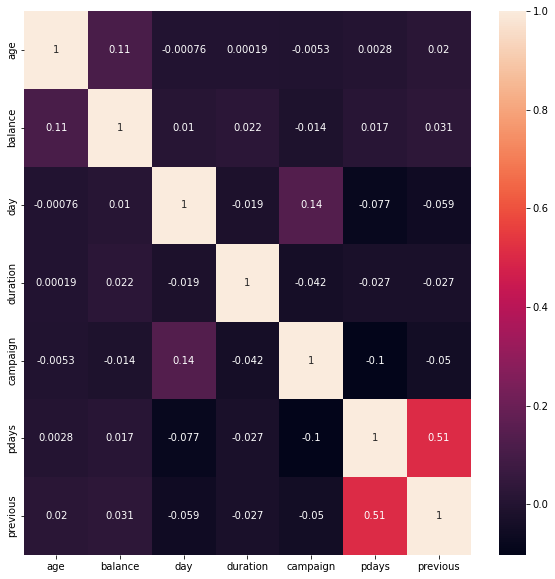

In [300]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

Checking correlation of features with each other.

<Figure size 720x720 with 0 Axes>

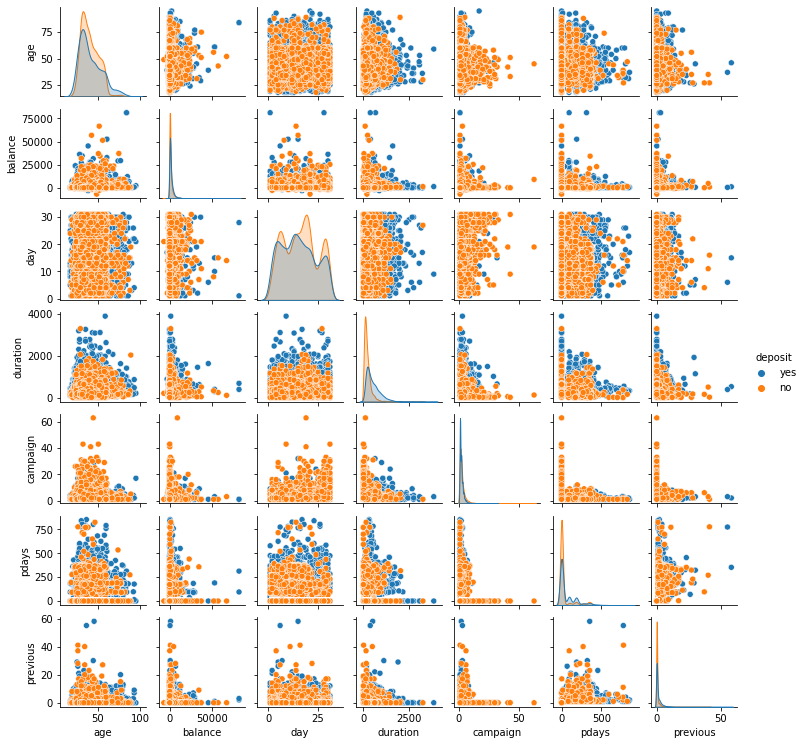

In [301]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df,hue='deposit',height=1.5)
plt.show()

In [302]:
df.skew()

age         0.862780
balance     8.224619
day         0.111330
duration    2.143695
campaign    5.545578
pdays       2.449986
previous    7.335298
dtype: float64

Mostly data is right skewed.

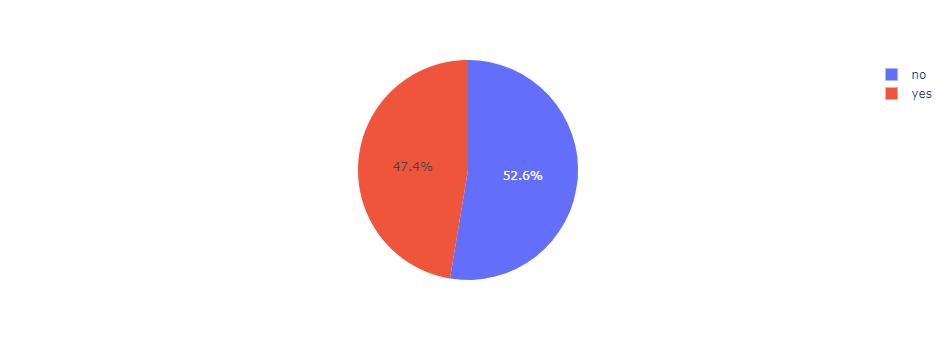

In [303]:
px.pie(df,names=df["deposit"])

There is 52% of chances term deposite in target column.

### Fetching categorical data

In [304]:
categorical_data=df.select_dtypes(exclude='number')
categorical_data

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown,no
11158,services,married,secondary,no,no,no,unknown,jun,unknown,no
11159,technician,single,secondary,no,no,no,cellular,aug,unknown,no
11160,technician,married,secondary,no,no,yes,cellular,may,failure,no


### Fetching numerical data

In [305]:
numeric_data=df.select_dtypes(include='number')
numeric_data

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


job


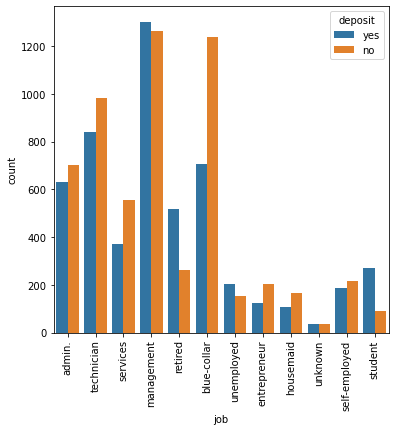

marital


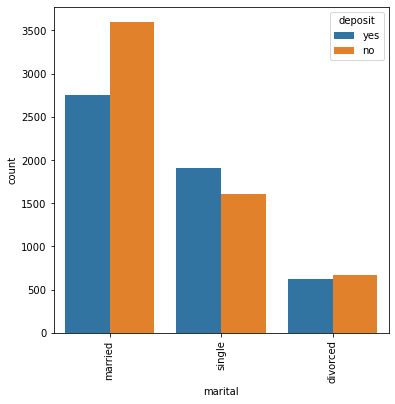

education


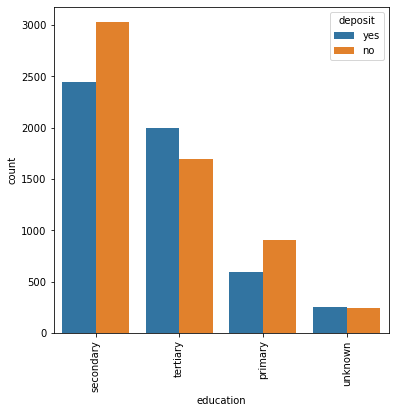

default


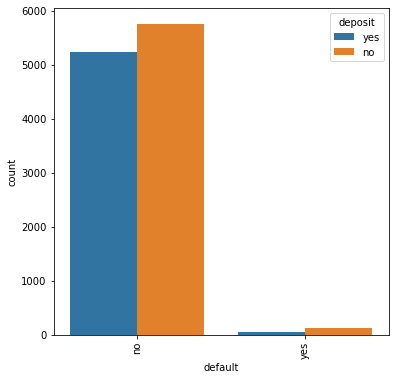

housing


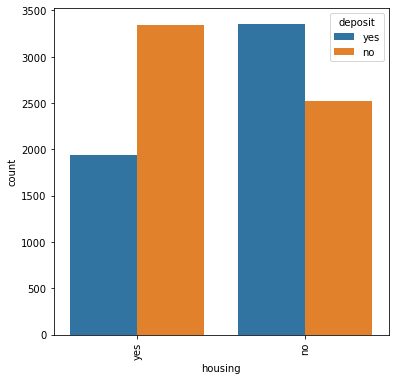

loan


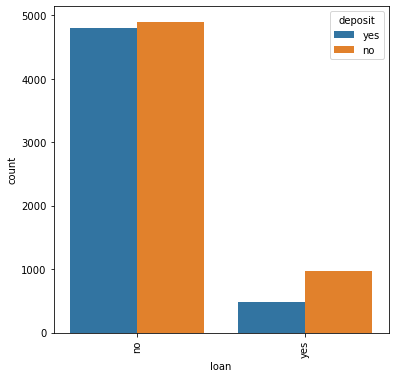

contact


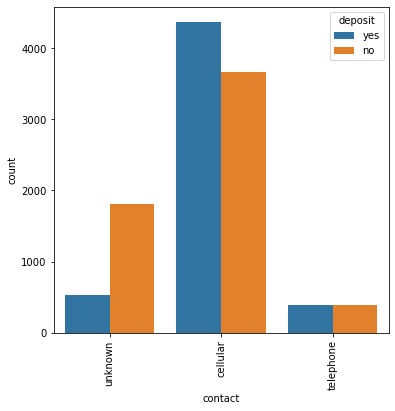

month


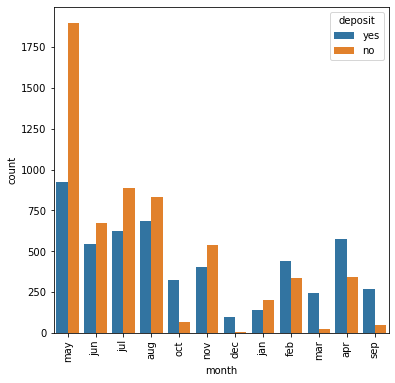

poutcome


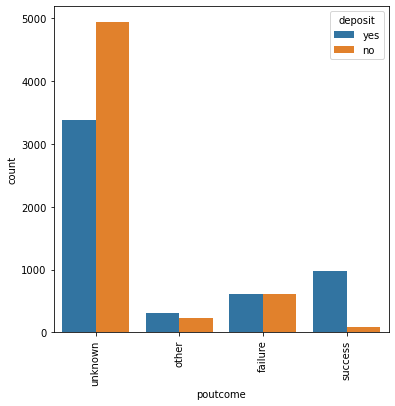

deposit


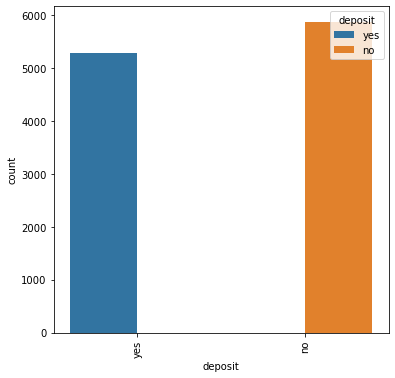

In [306]:
for i in categorical_data:
    print(i)
    
    plt.figure(figsize=(6,6))
    sns.countplot(df[i],hue=df['deposit'])
    plt.xticks(rotation=90)
    plt.show()

Management, Blue collar, technician have more chances for making a deposit
Married population have more chances of making a deposit
Secondary edcuation qualified have more chances to deposit
Population who have not taken a housing loan or any other loan have more chances to make a deposit
Higher the contact higher the chance of making a deposit
Most deposits are made in the month of May and April
Unknown poutcomes have contributed most for making a deposit

age
0.8626636888266407


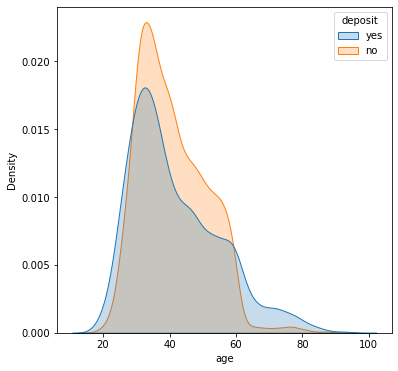

balance
8.223513810011928


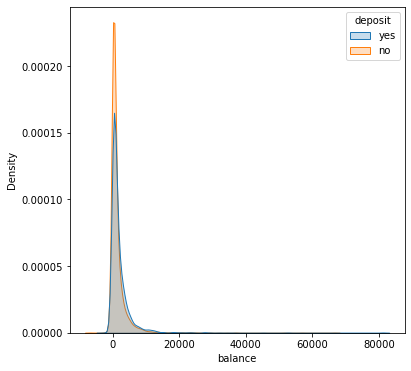

day
0.11131497345861763


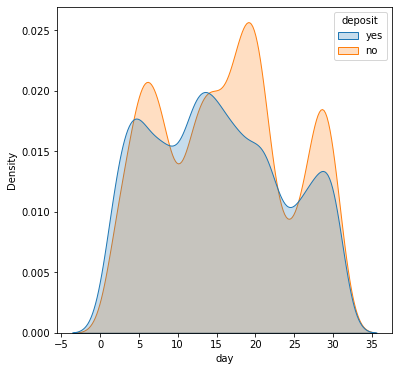

duration
2.1434064798758583


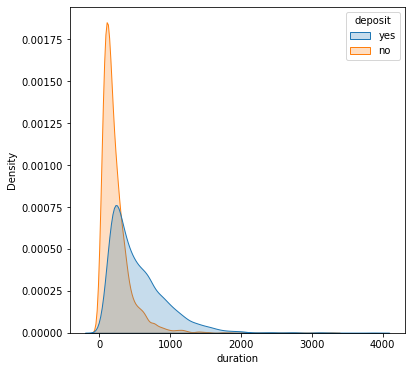

campaign
5.5448331721137


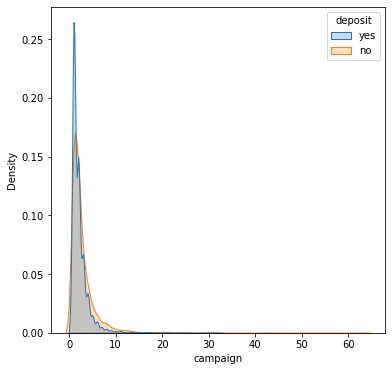

pdays
2.449656381764196


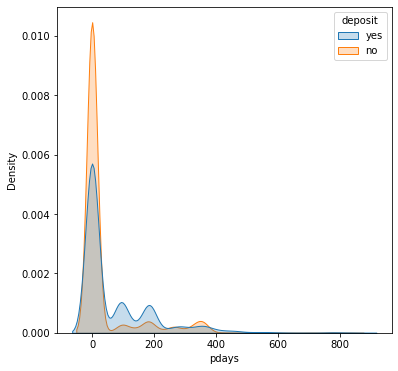

previous
7.334312390838451


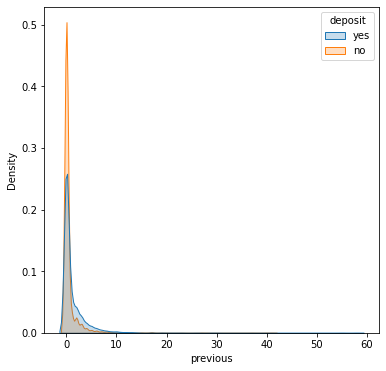

In [307]:
from scipy.stats import skew
for i in numeric_data:
    print(i)
    print(skew(df[i]))
    
    plt.figure(figsize=(6,6))
    sns.kdeplot(df[i],hue=df['deposit'],fill=True)
    plt.show()

30-40 Age group have the high chances of making a bank deposits
Balance is highly skewed which needs to be further analysed in detail
Campaign is correlated to deposits, higher number of campaigns helps generating more deposits
High postive skewness in pdays and previous

Now lets check there are outliers in data or not.

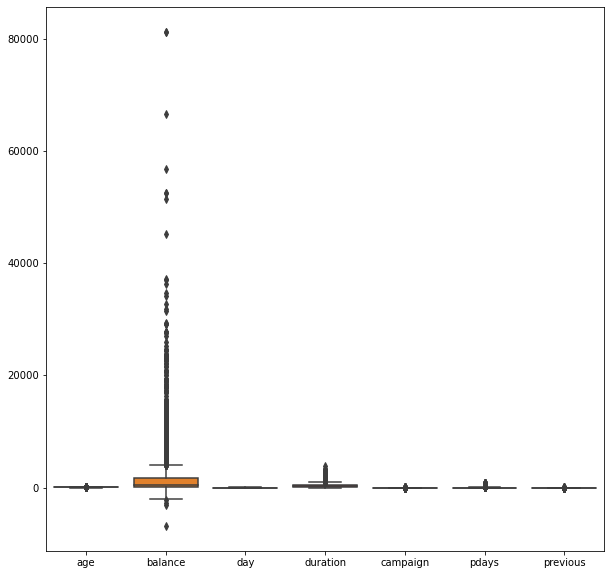

In [308]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.show()

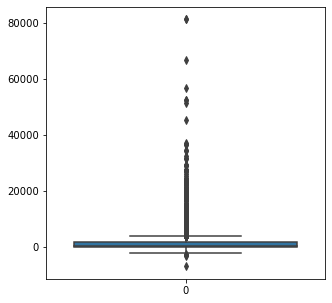

In [309]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['balance'])
plt.show()

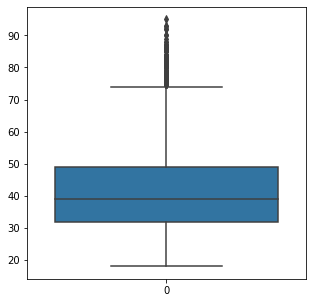

In [310]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['age'])
plt.show()

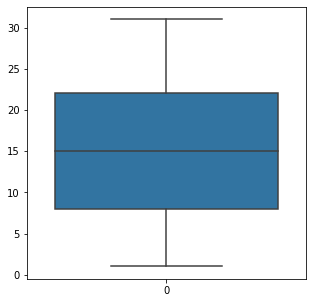

In [311]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['day'])
plt.show()

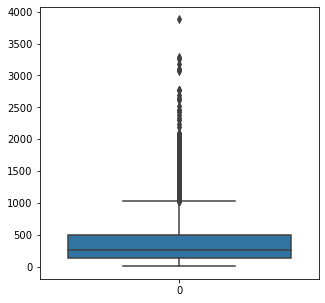

In [312]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['duration'])
plt.show()

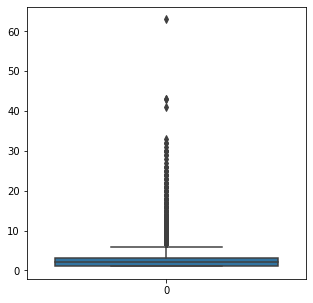

In [313]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['campaign'])
plt.show()

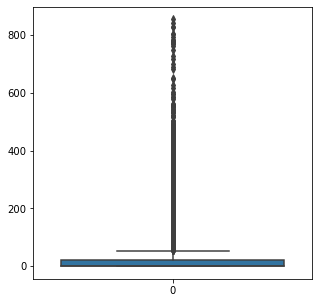

In [314]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['pdays'])
plt.show()

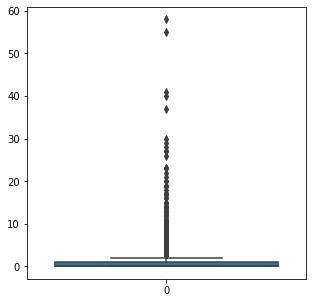

In [315]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['previous'])
plt.show()

There are outliers in all columns of dataset except day column.

In [316]:
#for balance column
q1=df["balance"].quantile(0.25)
q3=df["balance"].quantile(0.75)
iqr=q3-q1
lowerlimit=q1-(1.5*iqr)
upperlimit=q3+(1.5*iqr)
df["balance"]=np.where(df["balance"]<lowerlimit,lowerlimit,df["balance"])
df["balance"]=np.where(df["balance"]>upperlimit,upperlimit,df["balance"])

In [317]:
#for age column
q1=df["age"].quantile(0.25)
q3=df["age"].quantile(0.75)
iqr=q3-q1
lowerlimit=q1-(1.5*iqr)
upperlimit=q3+(1.5*iqr)
df["age"]=np.where(df["age"]>upperlimit,upperlimit,df["age"])

In [318]:
#for duration column
q1=df["duration"].quantile(0.25)
q3=df["duration"].quantile(0.75)
iqr=q3-q1
lowerlimit=q1-(1.5*iqr)
upperlimit=q3+(1.5*iqr)
df["duration"]=np.where(df["duration"]>upperlimit,upperlimit,df["duration"])

In [319]:
#for campaign column
q1=df["campaign"].quantile(0.25)
q3=df["campaign"].quantile(0.75)
iqr=q3-q1
lowerlimit=q1-(1.5*iqr)
upperlimit=q3+(1.5*iqr)
df["campaign"]=np.where(df["campaign"]>upperlimit,upperlimit,df["campaign"])

In [320]:
#for pdays column
q1=df["pdays"].quantile(0.25)
q3=df["pdays"].quantile(0.75)
iqr=q3-q1
lowerlimit=q1-(1.5*iqr)
upperlimit=q3+(1.5*iqr)
df["pdays"]=np.where(df["pdays"]>upperlimit,upperlimit,df["pdays"])

In [321]:
#for previous column
q1=df["previous"].quantile(0.25)
q3=df["previous"].quantile(0.75)
iqr=q3-q1
lowerlimit=q1-(1.5*iqr)
upperlimit=q3+(1.5*iqr)
df["previous"]=np.where(df["previous"]>upperlimit,upperlimit,df["previous"])

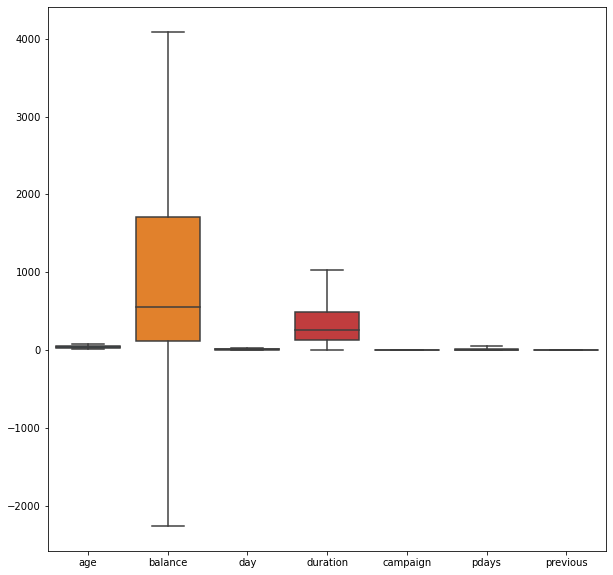

In [322]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.show()

Now there are no outliers in data.

### Converting object data type to numerical data type

In [323]:
df1 = pd.get_dummies(categorical_data,drop_first=True)
df1

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11158,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
11159,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
11160,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [324]:
df=pd.concat([numeric_data,df1],axis=1)
df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,5,1042,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,56,45,5,1467,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,54,184,5,673,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
11158,39,733,16,83,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11160,43,0,8,9,2,172,5,0,0,0,...,0,0,1,0,0,0,0,0,0,0


We Combined both Numericcal and categrical data in new single dataframe.

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   day                  11162 non-null  int64
 3   duration             11162 non-null  int64
 4   campaign             11162 non-null  int64
 5   pdays                11162 non-null  int64
 6   previous             11162 non-null  int64
 7   job_blue-collar      11162 non-null  uint8
 8   job_entrepreneur     11162 non-null  uint8
 9   job_housemaid        11162 non-null  uint8
 10  job_management       11162 non-null  uint8
 11  job_retired          11162 non-null  uint8
 12  job_self-employed    11162 non-null  uint8
 13  job_services         11162 non-null  uint8
 14  job_student          11162 non-null  uint8
 15  job_technician       11162 non-null  uint8
 16  job_unemployed       1

### features selection

In [326]:
X=df.drop(['deposit_yes'],axis=1)
X.shape

(11162, 42)

In [327]:
Y=df['deposit_yes']

### Data Standardization

In [328]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [329]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,Y,test_size=0.2,random_state=42)

Spliting data into for training and testing.

Lets apply Machine Learning algorithms for prediction.

### LogisticRegression

In [330]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [331]:
#Training and testing score
print("Training score is",LR.score(X_train,y_train))
print("Testing score is",LR.score(X_test,y_test))

Training score is 0.8296561765035279
Testing score is 0.8083296014330497


In [332]:
#Classification report
predict_LR_x=LR.predict(X_test)
print(classification_report(y_test,predict_LR_x))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1166
           1       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



In [333]:
#Performance Parameters
print("Accuracy is ",metrics.accuracy_score(y_test,predict_LR_x))
print("precsion is ",metrics.precision_score(y_test,predict_LR_x))
print("recall is ",metrics.recall_score(y_test,predict_LR_x))

Accuracy is  0.8083296014330497
precsion is  0.8111002921129503
recall is  0.7806935332708529


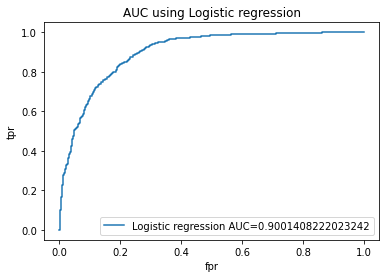

In [334]:
#AUC value
predict_LR =LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  predict_LR)
auc = metrics.roc_auc_score(y_test, predict_LR)
plt.plot(fpr,tpr,label="Logistic regression AUC="+str(auc))
plt.legend(loc=4)
plt.title("AUC using Logistic regression")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show();

### Naive Bayes

In [335]:
#Algoritm
NB=BernoulliNB()
#Fit
NB.fit(X_train,y_train)

BernoulliNB()

In [336]:
#Training and testing score
print("Training score is",NB.score(X_train,y_train))
print("Testing score is",NB.score(X_test,y_test))

Training score is 0.7224773210885878
Testing score is 0.7313031795790417


In [337]:
#Classification Report
predict_NB_x=NB.predict(X_test)
print(classification_report(y_test,predict_NB_x))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1166
           1       0.74      0.68      0.71      1067

    accuracy                           0.73      2233
   macro avg       0.73      0.73      0.73      2233
weighted avg       0.73      0.73      0.73      2233



In [338]:
#Performance Parameters
print("Accuracy is ",metrics.accuracy_score(y_test,predict_NB_x))
print("precsion is ",metrics.precision_score(y_test,predict_NB_x))
print("recall is ",metrics.recall_score(y_test,predict_NB_x))

Accuracy is  0.7313031795790417
precsion is  0.7370558375634517
recall is  0.6804123711340206


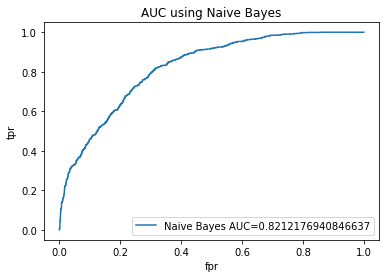

In [339]:
#AUC value
predict_NB=NB.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_NB)
auc=roc_auc_score(y_test,predict_NB)
plt.plot(fpr,tpr,label="Naive Bayes AUC="+str(auc))
plt.title("AUC using Naive Bayes")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show();

### KNN

In [340]:
#Algoritm
KNN=KNeighborsClassifier()
#Fit
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [341]:
#Training and testing score
print("Training score is",KNN.score(X_train,y_train))
print("Testing score is",KNN.score(X_test,y_test))

Training score is 0.8405196550565572
Testing score is 0.7666815942678011


In [342]:
#Classification Report
predict_KNN_x=KNN.predict(X_test)
print(classification_report(y_test,predict_KNN_x))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1166
           1       0.79      0.70      0.74      1067

    accuracy                           0.77      2233
   macro avg       0.77      0.76      0.76      2233
weighted avg       0.77      0.77      0.77      2233



In [343]:
#Performance parameters
print("Accuracy is ",metrics.accuracy_score(y_test,predict_KNN_x))
print("precsion is ",metrics.precision_score(y_test,predict_KNN_x))
print("recall is ",metrics.recall_score(y_test,predict_KNN_x))

Accuracy is  0.7666815942678011
precsion is  0.7910447761194029
recall is  0.6954076850984068


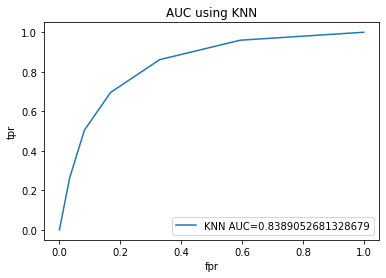

In [344]:
#AUC value
predict_KNN=KNN.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_KNN)
auc=roc_auc_score(y_test,predict_KNN)
plt.plot(fpr,tpr,label="KNN AUC="+str(auc))
plt.title("AUC using KNN")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show();

### SVM

In [345]:
#Algoritm
SVM=SVC(probability=True)
#Fit
SVM.fit(X_train,y_train)

SVC(probability=True)

In [346]:
#Training and testing score
print("Training score is",SVM.score(X_train,y_train))
print("Testing score is",SVM.score(X_test,y_test))

Training score is 0.8830776122746108
Testing score is 0.8365427675772503


In [347]:
#Classification Report
predict_SVM_x=SVM.predict(X_test)
print(classification_report(y_test,predict_SVM_x))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1166
           1       0.82      0.84      0.83      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



In [348]:
#Performance Parameters
print("Accuracy is ",metrics.accuracy_score(y_test,predict_SVM_x))
print("precsion is ",metrics.precision_score(y_test,predict_SVM_x))
print("recall is ",metrics.recall_score(y_test,predict_SVM_x))

Accuracy is  0.8365427675772503
precsion is  0.8243992606284658
recall is  0.8359887535145267


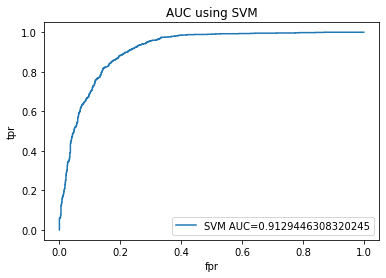

In [349]:
#AUC value
predict_SVM=SVM.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_SVM)
auc=roc_auc_score(y_test,predict_SVM)
plt.plot(fpr,tpr,label="SVM AUC="+str(auc))
plt.title("AUC using SVM")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show();

### Decision Tree

In [350]:
#Algoritm
DT=DecisionTreeClassifier()
#Fit
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [351]:
#Traing and testing score
print("Traning score is",DT.score(X_train,y_train))
print("Testing score is",DT.score(X_test,y_test))

Traning score is 1.0
Testing score is 0.787281683833408


In [352]:
#Classification Report
predict_DT=DT.predict(X_test)
print(classification_report(y_test,predict_DT))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1166
           1       0.78      0.77      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



In [353]:
#Performance Parameters
print("Accuracy is ",metrics.accuracy_score(y_test,predict_DT))
print("precsion is ",metrics.precision_score(y_test,predict_DT))
print("recall is ",metrics.recall_score(y_test,predict_DT))

Accuracy is  0.787281683833408
precsion is  0.7813688212927756
recall is  0.7703842549203374


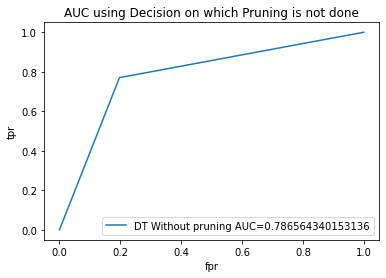

In [354]:
#AUC value
predict_DT=DT.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_DT)
auc=roc_auc_score(y_test,predict_DT)
plt.plot(fpr,tpr,label="DT Without pruning AUC="+str(auc))
plt.title("AUC using Decision on which Pruning is not done")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

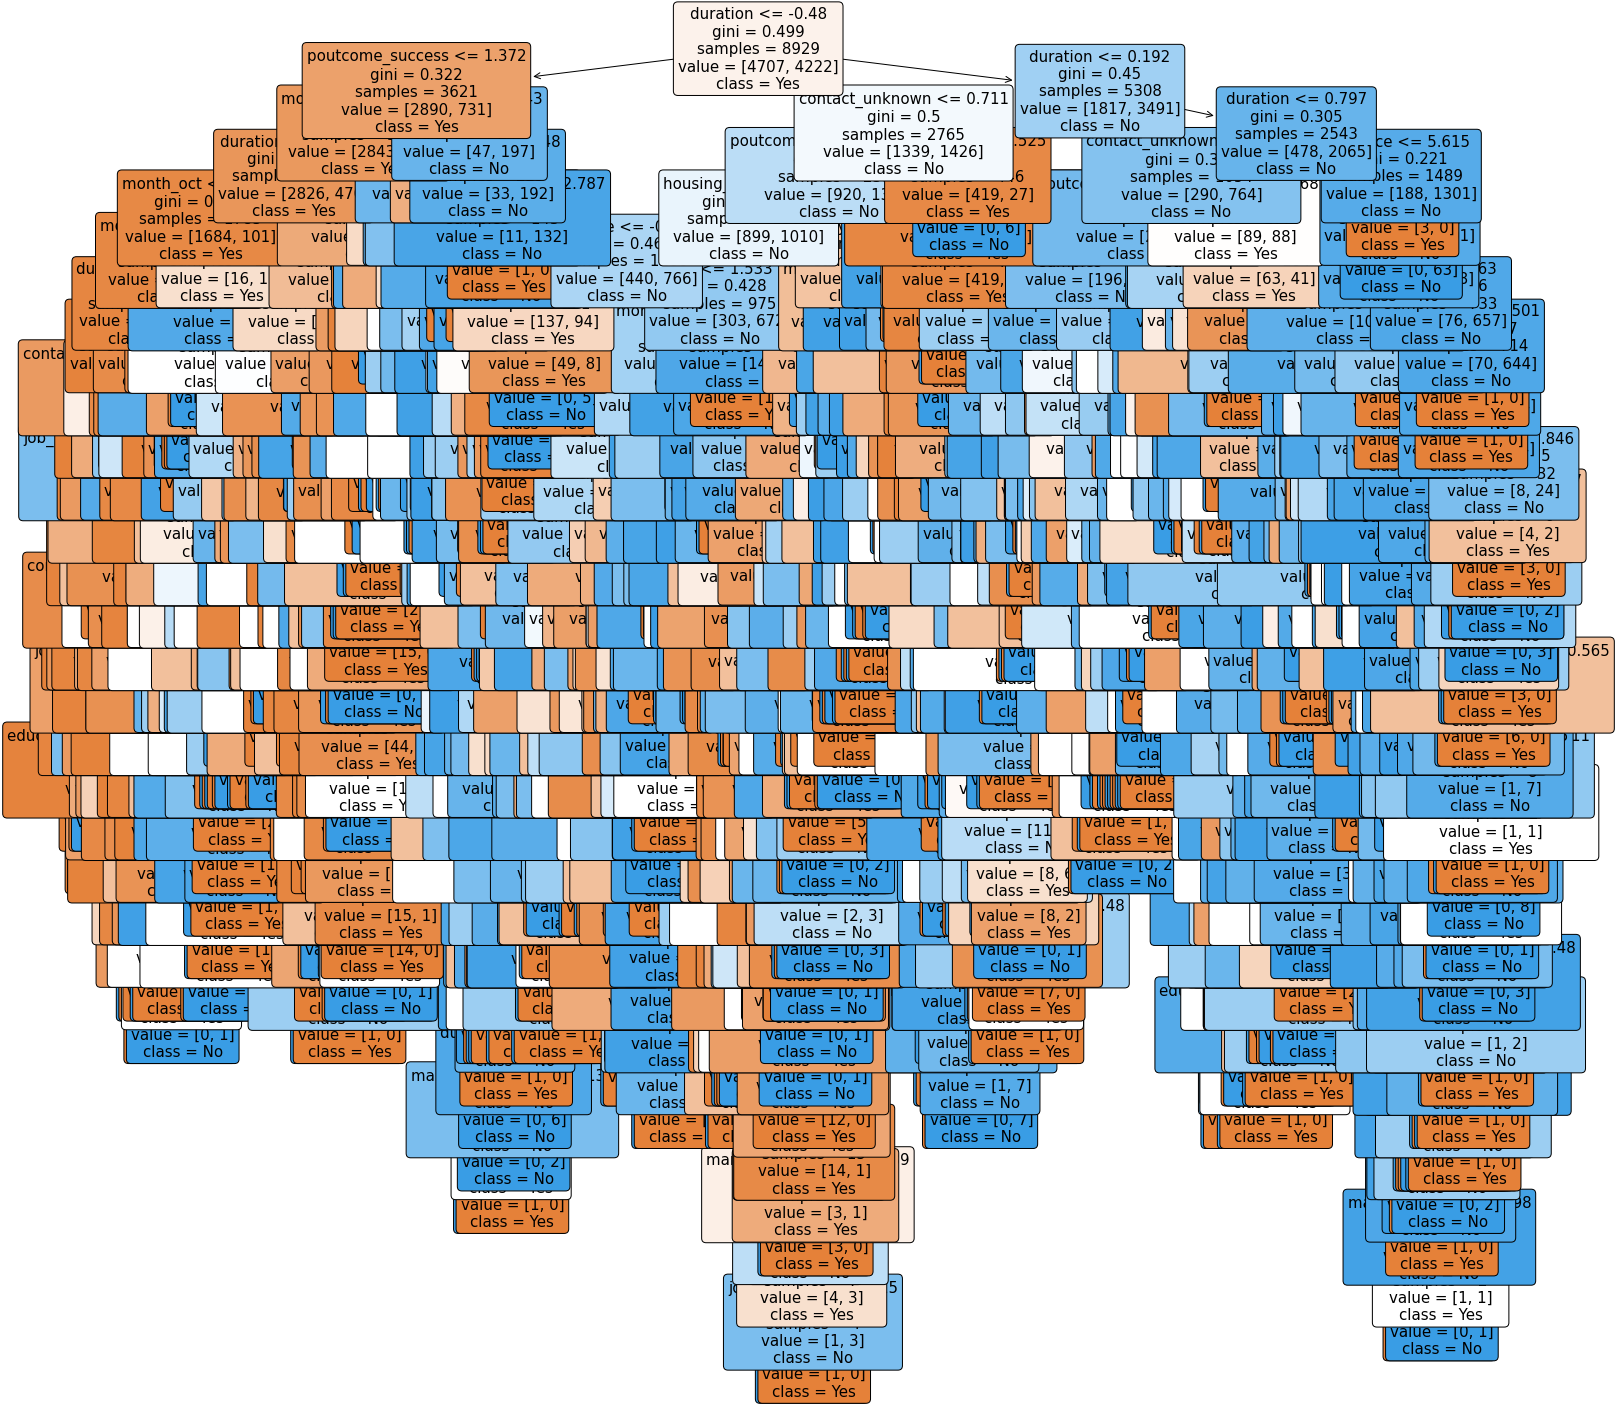

In [355]:
#Tree
plt.figure(figsize=(25,25)) 
figure=tree.plot_tree(DT,feature_names=X.columns[::],class_names=["Yes","No"],filled=True,rounded=True,fontsize=15);

Decison tree model is overfitting.

In [356]:
#Pruning
#Parameters
hyper_params=dict(criterion=['gini'],max_depth=list(range(1,600)),min_samples_split=list(range(1,600)),min_samples_leaf=list(range(1,600)))
#Gridsearch
Random=RandomizedSearchCV(DT,param_distributions=hyper_params,scoring="accuracy",cv=10)
#Fit
Random.fit(X_train,y_train)
#Best estimators
Random.best_estimator_

DecisionTreeClassifier(max_depth=204, min_samples_leaf=3, min_samples_split=253)

In [357]:
#Algoritm
DT_P=DecisionTreeClassifier(max_depth=274, min_samples_leaf=101,
                       min_samples_split=215)
#Fit
DT_P.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=274, min_samples_leaf=101,
                       min_samples_split=215)

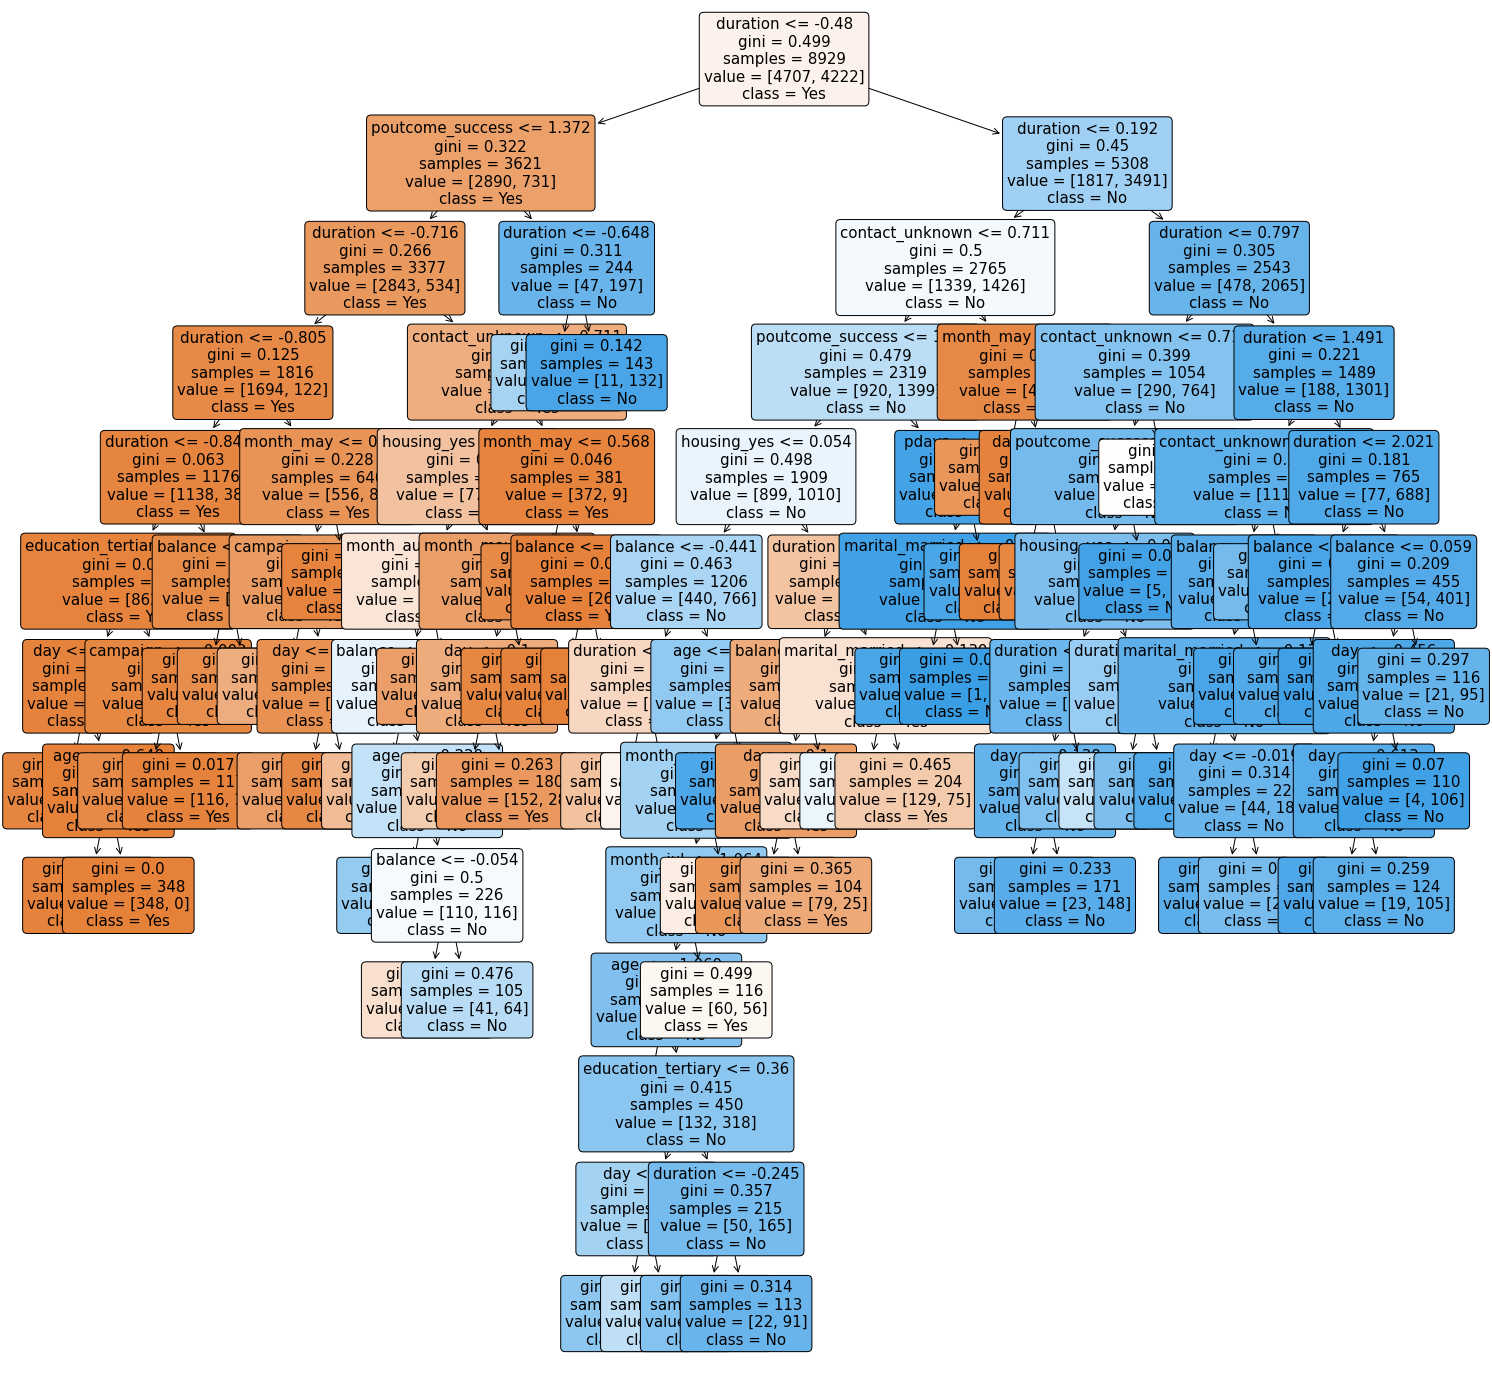

In [358]:
#Tree
plt.figure(figsize=(25,25)) 
figure=tree.plot_tree(DT_P,feature_names=X.columns[::],class_names=["Yes","No"],filled=True,rounded=True,fontsize=15);

In [359]:
#Traing and testing score
print("Traning score is",DT_P.score(X_train,y_train))
print("Testing score is",DT_P.score(X_test,y_test))

Traning score is 0.8171127785866279
Testing score is 0.7890729959695477


In [360]:
#Classification Report
predict_DT_P=DT_P.predict(X_test)
print(classification_report(y_test,predict_DT_P))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1166
           1       0.78      0.77      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



In [361]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_DT_P))
print("precsion is ",metrics.precision_score(y_test,predict_DT_P))
print("recall is ",metrics.recall_score(y_test,predict_DT_P))

Accuracy is  0.7890729959695477
precsion is  0.7838095238095238
recall is  0.7713214620431116


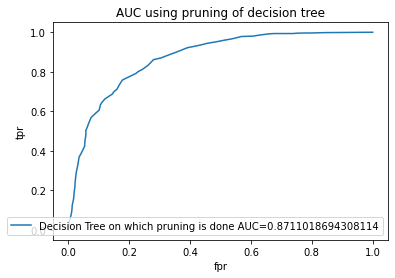

In [362]:
#AUC value
predict_DT_P=DT_P.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_DT_P)
auc=roc_auc_score(y_test,predict_DT_P)
plt.plot(fpr,tpr,label="Decision Tree on which pruning is done AUC="+str(auc))
plt.title("AUC using pruning of decision tree")
plt.legend(loc=4)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show();

### Ensemble Techniques.

### 1.Random Forest

In [363]:
#Agorithm
RF=RandomForestClassifier(n_estimators=1000)
#Fit
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [364]:
#Traning and testing score
print("Training score is",RF.score(X_train,y_train))
print("Testing score is",RF.score(X_test,y_test))

Training score is 1.0
Testing score is 0.8401253918495298


In [365]:
#Classification Report
predict_RF=RF.predict(X_test)
print(classification_report(y_test,predict_RF))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1166
           1       0.81      0.87      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



In [366]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_RF))
print("precsion is ",metrics.precision_score(y_test,predict_RF))
print("recall is ",metrics.recall_score(y_test,predict_RF))

Accuracy is  0.8401253918495298
precsion is  0.81195079086116
recall is  0.865979381443299


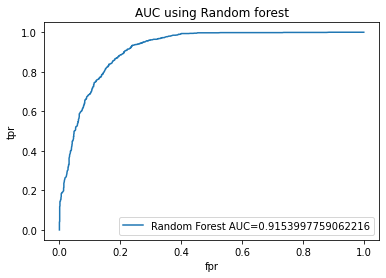

In [367]:
#AUC value
predict_RF=RF.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_RF)
auc=roc_auc_score(y_test,predict_RF)
plt.plot(fpr,tpr,label="Random Forest AUC="+str(auc))
plt.title("AUC using Random forest")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

### 2.Extra Trees

In [368]:
#Algoritm
ET=ExtraTreesClassifier(n_estimators=10)
#Fit 
ET.fit(X_train,y_train)

ExtraTreesClassifier(n_estimators=10)

In [369]:
#Traning and testing score
print("Training score is",ET.score(X_train,y_train))
print("Testing score is",ET.score(X_test,y_test))

Training score is 1.0
Testing score is 0.7908643081056874


In [370]:
#Classification Report
predict_ET=ET.predict(X_test)
print(classification_report(y_test,predict_ET))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1166
           1       0.81      0.74      0.77      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



In [371]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_ET))
print("precsion is ",metrics.precision_score(y_test,predict_ET))
print("recall is ",metrics.recall_score(y_test,predict_ET))

Accuracy is  0.7908643081056874
precsion is  0.8080082135523614
recall is  0.7375820056232427


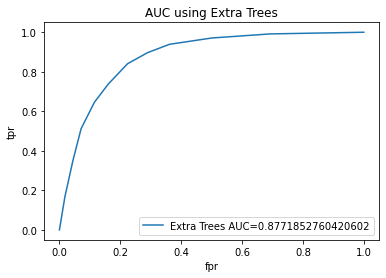

In [372]:
#AUC value
predict_ET=ET.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_ET)
auc=roc_auc_score(y_test,predict_ET)
plt.plot(fpr,tpr,label="Extra Trees AUC="+str(auc))
plt.title("AUC using Extra Trees")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show();

### 3.Bagging Classification

In [373]:
#Algorithm
BC=BaggingClassifier()
#Fit
BC.fit(X_train,y_train)

BaggingClassifier()

In [374]:
#Traning and testing score
print("Training score is",BC.score(X_train,y_train))
print("Testing score is",BC.score(X_test,y_test))

Training score is 0.9900324784410348
Testing score is 0.8204209583519928


In [375]:
#Classification Report
predict_BC=BC.predict(X_test)
print(classification_report(y_test,predict_BC))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1166
           1       0.82      0.81      0.81      1067

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



In [376]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_BC))
print("precsion is ",metrics.precision_score(y_test,predict_BC))
print("recall is ",metrics.recall_score(y_test,predict_BC))

Accuracy is  0.8204209583519928
precsion is  0.8159392789373814
recall is  0.8059981255857545


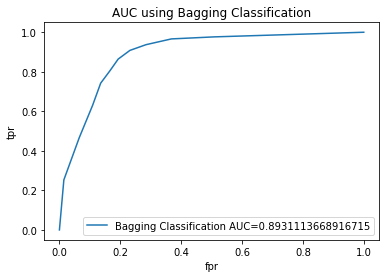

In [377]:
#AUC value
predict_BC=BC.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_BC)
auc=roc_auc_score(y_test,predict_BC)
plt.plot(fpr,tpr,label="Bagging Classification AUC="+str(auc))
plt.title("AUC using Bagging Classification")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

### 4.Adaboost

In [378]:
#Algorithm
AB=AdaBoostClassifier()
#Fit
AB.fit(X_train,y_train)

AdaBoostClassifier()

In [379]:
#Traning and testing score
print("Training score is",AB.score(X_train,y_train))
print("Testing score is",AB.score(X_test,y_test))

Training score is 0.8298801657520439
Testing score is 0.8226600985221675


In [380]:
#Classification Report
predict_AB=AB.predict(X_test)
print(classification_report(y_test,predict_AB))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1166
           1       0.83      0.79      0.81      1067

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



In [381]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_AB))
print("precsion is ",metrics.precision_score(y_test,predict_AB))
print("recall is ",metrics.recall_score(y_test,predict_AB))

Accuracy is  0.8226600985221675
precsion is  0.8311944718657454
recall is  0.7891283973758201


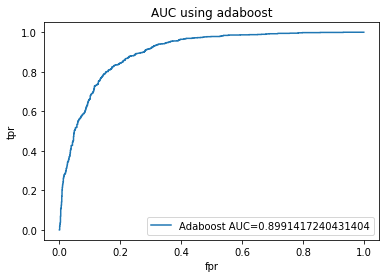

In [382]:
#AUC value
predict_AB=AB.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_AB)
auc=roc_auc_score(y_test,predict_AB)
plt.plot(fpr,tpr,label="Adaboost AUC="+str(auc))
plt.title("AUC using adaboost")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

### 5.Gradient Boost

In [383]:
#Algorithm
GB=GradientBoostingClassifier()
#Fit
GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [384]:
#Traning and testing score
print("Training score is",GB.score(X_train,y_train))
print("Testing score is",GB.score(X_test,y_test))

Training score is 0.8625825960353903
Testing score is 0.8311688311688312


In [385]:
#Classification Report
predict_GB=GB.predict(X_test)
print(classification_report(y_test,predict_GB))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1166
           1       0.82      0.84      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



In [386]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_GB))
print("precsion is ",metrics.precision_score(y_test,predict_GB))
print("recall is ",metrics.recall_score(y_test,predict_GB))

Accuracy is  0.8311688311688312
precsion is  0.8159340659340659
recall is  0.8350515463917526


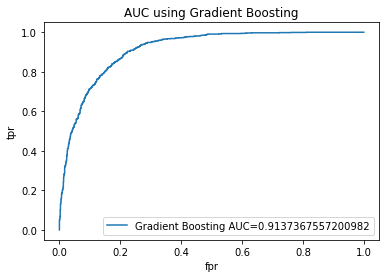

In [387]:
#AUC value
predict_GB=GB.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_GB)
auc=roc_auc_score(y_test,predict_GB)
plt.plot(fpr,tpr,label="Gradient Boosting AUC="+str(auc))
plt.title("AUC using Gradient Boosting")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

### 6.Xgboost

In [388]:
#Algorithm
XG=XGBClassifier()
#Fit
XG.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [389]:
#Traning and testing score
print("Training score is",XG.score(X_train,y_train))
print("Testing score is",XG.score(X_test,y_test))

Training score is 0.9564340911636241
Testing score is 0.8432601880877743


In [390]:
#Classification Report
predict_XG=XG.predict(X_test)
print(classification_report(y_test,predict_XG))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1166
           1       0.82      0.85      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



In [391]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_XG))
print("precsion is ",metrics.precision_score(y_test,predict_XG))
print("recall is ",metrics.recall_score(y_test,predict_XG))

Accuracy is  0.8432601880877743
precsion is  0.8238482384823849
recall is  0.8547328959700093


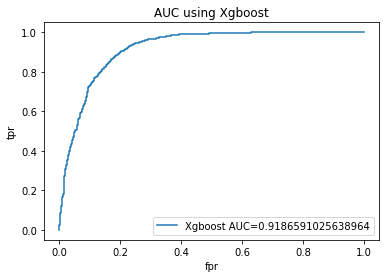

In [392]:
#AUC value
predict_XG=XG.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_XG)
auc=roc_auc_score(y_test,predict_XG)
plt.plot(fpr,tpr,label="Xgboost AUC="+str(auc))
plt.title("AUC using Xgboost")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

### Result

In [393]:
result=pd.DataFrame({"Algoritm":["Logistic Regression","Naive Bayes","KNN","SVM","Decision Tree","Decision Tree after Hyerparametric Tunning","Random Forest","Extra Trees","Bagging Classification","Adaboost","Gradient Boost","XgBoost"],
                   "Accuracy":[0.8083,0.7313,0.7666,0.8365,0.7872,0.7890,0.8410,0.7868,0.8253,0.8226,0.8311,0.8432 ],
                  "Precision":[0.8111,0.7370,0.7910,0.8243,0.7857,0.7838,0.8133,0.8030,0.8184,0.8311,0.8159,0.8238 ],
                     "Recall":[0.7806,0.6804,0.6954,0.8359,0.7628,0.7713,0.8659,0.7338,0.8153,0.7891,0.8350,0.8547 ],
                        "AUC":[0.9001,0.8212,0.8389,0.9129,0.7862,0.8711,0.9161,0.8794,0.8949,0.8991,0.9137,0.9186 ]},index=list(range(1,13)))
result

,Algoritm,Accuracy,Precision,Recall,AUC
1,Logistic Regression,0.8083,0.8111,0.7806,0.9001
2,Naive Bayes,0.7313,0.7370,0.6804,0.8212
3,KNN,0.7666,0.7910,0.6954,0.8389
4,SVM,0.8365,0.8243,0.8359,0.9129
5,Decision Tree,0.7872,0.7857,0.7628,0.7862
6,Decision Tree after Hyerparametric Tunning,0.7890,0.7838,0.7713,0.8711
7,Random Forest,0.8410,0.8133,0.8659,0.9161
8,Extra Trees,0.7868,0.8030,0.7338,0.8794
9,Bagging Classification,0.8253,0.8184,0.8153,0.8949
10,Adaboost,0.8226,0.8311,0.7891,0.8991


### Conclusion

The final result shows us XGBoost classifier algorithm is best model for future prediction as it has highest AUC value 0.9186.

### Prediction

In [394]:
prediction= pd.DataFrame({'Actual value': y_test, 'Predicted value':XG.predict(X_test)})
prediction.head(10)

,Actual value,Predicted value
5527,0,1
4541,1,1
1964,1,1
5007,1,1
8928,0,0
8936,0,1
6141,0,0
8786,0,0
8697,0,1
8582,0,1


### Thank You